# Bab 7 Learning Vector Quantization

## Praktikum

### a) Fungsi *Training* LVQ

Tulis kode ke dalam *cell* di bawah ini:

In [25]:
import numpy as np

def lvq_fit(train, target, lrate, b, max_epoch):
    label, train_idx = np.unique(target, return_index=True)
    weight = train[train_idx].astype(np.float64)
    train = np.array([e for i, e in enumerate(train) if i not in train_idx])
    target = np.array([e for i, e in enumerate(target) if i not in train_idx])
    train, target = train[:, 0], train[:, 1]
    epoch = 0

    while epoch < max_epoch:
        for i, x in enumerate(train):
            distance = [sum((w - x) ** 2) for w in weight]
            min = np.argmin(distance)
            sign = 1 if target[i] == label[min] else -1
            weight[min] += sign * lrate * (x - weight[min])
            lrate *= b
            epoch += 1

    return weight, label

### b) Fungsi *Testing* LVQ

Tulis kode ke dalam *cell* di bawah ini:

In [26]:
def lvq_predict(X, model):
    center, label = model
    Y = []

    for x in X:
        d = [sum((c - x) ** 2) for c in center]
        Y.append(label[np.argmin(d)])

    return Y

### c) Fungsi Hitung Akurasi

In [27]:
def calc_accuracy(a, b):
    s = [1 if a[i] == b[i] else 0 for i in range(len(a))]

    return sum(s) / len(a)

### d) Percobaan LVQ

Tulis kode ke dalam *cell* di bawah ini:

Accuracy: 0.8571428571428571


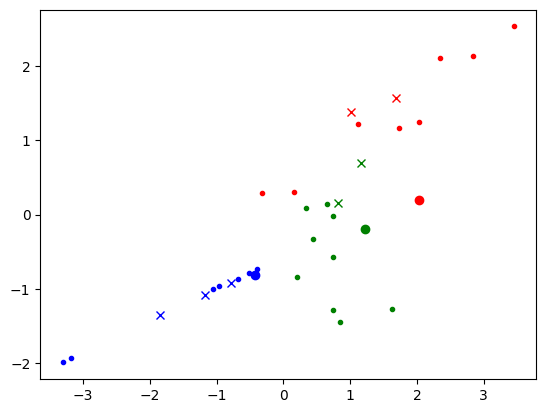

In [35]:
from random import uniform
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs, make_classification

X, y = make_classification(n_samples=31, n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = lvq_fit(X_train, y_train, lrate=.5, b=.8, max_epoch=50)
output = lvq_predict(X_test, model)
accuracy = calc_accuracy(output, y_test)
colors = 'rgbcmyk'

print('Accuracy:', accuracy)

for x, label in zip(X_train, y_train):
  plt.plot(x[0], x[1], colors[label] + '.')

for center, label in zip(model[0], model[1]):
  plt.plot(center[0], center[1], colors[label] + 'o')

for x, label in zip(X_test, output):
  plt.plot(x[0], x[1], colors[label] + 'x')

## Analisis

Jalankan kode d beberapa kali hingga didapat akurasi kurang dari 1. Amati dan analisis di mana terjadi error.

Error ini muncul karena pada baris ini:

train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])

Di sini, train merupakan array dua dimensi dari fitur, sedangkan target adalah array satu dimensi dari label. Ketika train dan target digabungkan dalam tuple, hasilnya adalah struktur data campuran yang menyebabkan error saat mencoba mengubahnya kembali menjadi array numpy. Untuk memperbaikinya, kita bisa memisahkan fitur dan target dalam variabel yang terpisah sebelum melanjutkan pengolahan lebih lanjut. Menjadi:

train = np.array([e for i, e in enumerate(train) if i not in train_idx])

target = np.array([e for i, e in enumerate(target) if i not in train_idx])


## Kesimpulan

1. Apa yang membedakan LVQ dengan SOM?

Learning Vector Quantization (LVQ) dan Self-Organizing Map (SOM) adalah metode pembelajaran berbasis vektor yang sering digunakan dalam analisis data, namun memiliki perbedaan mendasar. LVQ merupakan metode supervised learning yang menggunakan data berlabel untuk melakukan klasifikasi. Sementara itu, SOM adalah metode unsupervised learning yang bekerja tanpa label dan bertujuan untuk mengelompokkan data ke dalam peta dua dimensi untuk visualisasi pola.
Pada LVQ, setiap prototipe mewakili kelas tertentu dari data latih dan diperbarui mendekati data yang memiliki label sama atau menjauh dari label berbeda. Hal ini membuat LVQ sangat cocok untuk tugas klasifikasi yang membutuhkan pemisahan antar kelas yang jelas. Di sisi lain, SOM membentuk grid atau matriks neuron, di mana setiap neuron merepresentasikan area dalam peta yang menunjukkan distribusi data. Pembaruan pada SOM dilakukan tidak hanya pada neuron terdekat, tetapi juga pada neuron tetangganya, untuk menjaga hubungan topologis.

Algoritma pembaruan LVQ berbeda dari SOM, karena berfokus pada peningkatan akurasi klasifikasi, sedangkan SOM mengutamakan pembentukan peta topologi yang menunjukkan struktur atau kluster data. Pada LVQ, vektor prototipe diubah untuk memperbaiki pemetaan kelas berdasarkan label. Sementara di SOM, pembaruan dilakukan dengan memperhitungkan tetangga dari neuron yang menang, sehingga hasil akhirnya adalah representasi data yang terstruktur.
Hasil dari kedua metode ini pun berbeda. LVQ menghasilkan sekumpulan prototipe kelas yang dapat digunakan untuk klasifikasi data baru berdasarkan jarak ke prototipe tersebut. SOM, di sisi lain, menghasilkan grid dua dimensi yang memungkinkan visualisasi cluster atau pengelompokan data secara alami, menjadikannya ideal untuk eksplorasi data.
Secara keseluruhan, LVQ sering digunakan untuk tugas klasifikasi dengan kebutuhan pembelajaran terarah, sedangkan SOM berguna dalam eksplorasi dan visualisasi data yang memiliki dimensi tinggi tanpa informasi label.

2. Apa yang membedakan LVQ dengan JST lain yang sesama digunakan untuk klasifikasi?

Learning Vector Quantization (LVQ) berbeda dari jaringan syaraf tiruan (JST) lain yang juga digunakan untuk klasifikasi, seperti Multilayer Perceptron (MLP) atau Radial Basis Function (RBF), terutama dalam struktur dan metode pembelajaran. LVQ memiliki struktur jaringan yang lebih sederhana, terdiri dari lapisan input dan sekumpulan prototipe kelas di lapisan output. Metode pembelajarannya berbasis kompetisi, di mana setiap prototipe mendekati data dengan label yang sama atau menjauh dari data dengan label berbeda. Sementara itu, MLP dan RBF memiliki lapisan tersembunyi di antara input dan output, menggunakan metode backpropagation atau fungsi basis radial, sehingga lebih cocok untuk menangani hubungan yang kompleks dalam data.

Karena arsitekturnya yang sederhana, LVQ lebih efisien dan cepat dilatih pada masalah klasifikasi sederhana. Namun, MLP dan RBF biasanya lebih kuat dalam generalisasi untuk masalah klasifikasi yang lebih kompleks berkat lapisan tersembunyi yang memungkinkan pembelajaran fitur lebih mendalam. LVQ ideal untuk kasus dengan data yang terstruktur jelas antar kelas, sementara MLP dan RBF cocok untuk masalah klasifikasi non-linear yang memerlukan model dengan kapasitas lebih tinggi.
